# **<center>Housing Category Classificasion Model</center>**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go

In [10]:
df = pd.read_csv("/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv")


***loading the dataset (Part 2)***

In [2]:
data = pd.read_csv(r"dubai_properties.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'dubai_properties.csv'

In [ ]:
print(data.info())

## ***Part 3 : Data Cleaning and Preprocessing***

### ***Cleaning the null and duplicates***

In [ ]:
print(data.isna().sum())

***Removing null values***

In [ ]:
data.dropna(inplace=True)
print(data.isna().sum())

***Cheking duplicated values***

In [ ]:
print(data.duplicated().sum())

### ***Encoding***

In [ ]:
obj_columns = data.select_dtypes(include=["object"]).columns
for col in obj_columns:
    uniques = data[col].unique()
    print(col, uniques)

In [ ]:
columns_to_label_encoding = ["Rent_category", "Frequency", "Furnishing", "Purpose"]


columns_to_categorical_encoding = ["Address", "Type", "Location", "City"]

***Label Encoding***

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for col in columns_to_label_encoding:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
for col in columns_to_label_encoding:
    print(col, data[col].unique())

***Date Encoding*** *using (ordinal encoder)*

In [ ]:
data["Posted_date"] = pd.to_datetime(
    data["Posted_date"], format="%Y-%m-%d", errors="coerce"
).dt.day_of_year

In [ ]:
data["Posted_date"]

***Categorical Ecoding*** *(Target encoder)*

In [ ]:
# type this command in terminal: pip install category_encoders
import category_encoders as ce

In [ ]:
encoder = ce.TargetEncoder(cols=columns_to_categorical_encoding)
data_encoded = encoder.fit_transform(
    data[columns_to_categorical_encoding], data["Rent_category"]
)

data = pd.concat(
    [data.drop(columns=columns_to_categorical_encoding), data_encoded], axis=1
)

In [ ]:
data[columns_to_categorical_encoding]

### ***Handling Outilers***

In [ ]:
import seaborn as sns

***Handling outliers in 1st column***

In [ ]:
print(data.columns[0])

In [ ]:
sns.set_style("darkgrid")
sns.boxplot(data=data["Rent"])

In [ ]:
num_rent_outiers = (data["Rent"] > 0.5e7).sum()
print(num_rent_outiers)

In [ ]:
rent_mean = data["Rent"].mean()
print(rent_mean)

In [ ]:
data["Rent"].loc[data["Rent"] > 0.5e7] = rent_mean

In [ ]:
# check outliers again
num_rent_outiers = (data["Rent"] > 0.5e7).sum()
print(num_rent_outiers)

***Handling outliers in 2nd column***

In [ ]:
print(data.columns[1])

In [ ]:
sns.boxplot(data=data["Beds"])

In [ ]:
print(data["Beds"].min(), data["Beds"].max())

***Handling outliers in 3rd column***

In [ ]:
print(data.columns[2])

In [ ]:
sns.boxplot(data=data["Baths"])

In [ ]:
num_baths_outiers = (data["Baths"] > 10).sum()
print(num_baths_outiers)

In [ ]:
print((data["Baths"]).max())

***Handling outliers in 4th column***

In [ ]:
print(data.columns[3])

In [ ]:
sns.boxplot(data=data["Area_in_sqft"])

In [ ]:
area_mean = (data["Area_in_sqft"]).mean()
print(area_mean)

In [ ]:
num_area_outiers = (data["Area_in_sqft"] > 10000).sum()
print(num_area_outiers)

In [ ]:
(data["Area_in_sqft"]).max()

In [ ]:
data["Area_in_sqft"].loc[data["Area_in_sqft"] > 10000] = 10000

In [ ]:
# check outliers again
num_outiers = (data["Area_in_sqft"] > 10000).sum()
print(num_outiers)

***Handling outliers in 5th column***

In [ ]:
print(data.columns[4])

In [ ]:
sns.boxplot(data=data["Rent_per_sqft"])

In [ ]:
num_rent_sqft_outliears = (data["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

In [ ]:
data["Rent_per_sqft"].loc[data["Rent_per_sqft"] > 280] = 280

In [ ]:
# check num outliers again
num_rent_sqft_outliears = (data["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

***Handling outliers in 6th column***

In [ ]:
print(data.columns[5])

In [ ]:
sns.boxplot(data=data["Rent_category"])

***Handling outliers in 7th column***

In [ ]:
print(data.columns[6])

In [ ]:
sns.boxplot(data=data["Frequency"])

In [ ]:
print(
    data["Frequency"].max(),
    data["Frequency"].min(),
)

***Handling outliers in 8th column***

In [ ]:
print(data.columns[7])

In [ ]:
sns.boxplot(data=data["Furnishing"])

***Handling outliers in 9th column***

In [ ]:
print(data.columns[8])

In [ ]:
sns.boxplot(data=data["Purpose"])

***Handling outliers in 10th column***

In [ ]:
print(data.columns[9])

In [ ]:
sns.boxplot(data=data["Posted_date"])

In [ ]:
print(data["Posted_date"].min(), data["Posted_date"].max())
num_date_outlin = (data["Posted_date"] > 300).sum()
print(num_date_outlin)

In [ ]:
date_mean = data["Posted_date"].mean()
print(date_mean)

In [ ]:
data["Posted_date"].loc[data["Posted_date"] > 300] = date_mean

In [ ]:
print((data["Posted_date"] > 300).sum())

***Handling outliers in 11th column***

In [ ]:
print(data.columns[10])

In [ ]:
sns.boxplot(data=data["Age_of_listing_in_days"])

In [ ]:
print(data["Age_of_listing_in_days"].min(), data["Age_of_listing_in_days"].max())


num_age_outlier = (data["Age_of_listing_in_days"] > 200).sum()


print(num_age_outlier)

In [ ]:
age_mean = data["Age_of_listing_in_days"].mean()
print(age_mean)

In [ ]:
data["Age_of_listing_in_days"].loc[data["Age_of_listing_in_days"] > 200] = 200

In [ ]:
print((data["Age_of_listing_in_days"] > 200).sum())

***Handling outliers in 12th column***

In [ ]:
print(data.columns[11])

In [ ]:
sns.boxplot(data=data["Latitude"])

In [ ]:
print(data["Latitude"].min(), data["Latitude"].max())

***Handling outliers in 13th column***

In [ ]:
print(data.columns[12])

In [ ]:
sns.boxplot(data=data["Longitude"])

In [ ]:
print(data["Longitude"].min(), data["Longitude"].max())

***Handling outliers in 14th column***

In [ ]:
print(data.columns[13])

In [ ]:
sns.boxplot(data=data["Address"])

In [ ]:
address_mean = data["Address"].mean()
print(address_mean)

In [ ]:
num_outiers = (data["Address"] > 2.5).sum() + (data["Address"] < 1.7).sum()
print(num_outiers)

*replace outliers with mean*

In [ ]:
data["Address"].loc[data["Address"] > 2.5] = address_mean
data["Address"].loc[data["Address"] < 1.7] = address_mean

In [ ]:
# check outliers again
num_outiers = (data["Address"] > 2.5).sum() + (data["Address"] < 1.7).sum()
print(num_outiers)

***Handling outliers in 15th column***

In [ ]:
print(data.columns[14])

In [ ]:
sns.boxplot(data=data["Type"])

In [ ]:
print(data["Type"].min(), data["Type"].max())

***Handling outliers in 16th column***

In [ ]:
print(data.columns[15])

In [ ]:
sns.boxplot(data=data["Location"])

In [ ]:
print(data["Location"].min(), data["Location"].max())

***Handling outliers in 17th column***

In [ ]:
print(data.columns[16])

In [ ]:
sns.boxplot(data=data["City"])

In [ ]:
print(data["City"].min(), data["City"].max())

### ***Scaling***

In [ ]:
print(data.columns)

In [ ]:
colums_to_scaling = [
    "Rent",
    "Beds",
    "Baths",
    "Area_in_sqft",
    "Rent_per_sqft",
    "Rent_category",
    "Furnishing",
    "Posted_date",
    "Age_of_listing_in_days",
    "Latitude",
    "Longitude",
    "Address",
]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(data[colums_to_scaling])

In [ ]:
scaler.fit_transform(data[colums_to_scaling])

In [ ]:
data[colums_to_scaling] = scaler.transform(data[colums_to_scaling])

In [ ]:
data[colums_to_scaling]

In [ ]:
data

In [27]:
df = pd.read_csv("/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv")


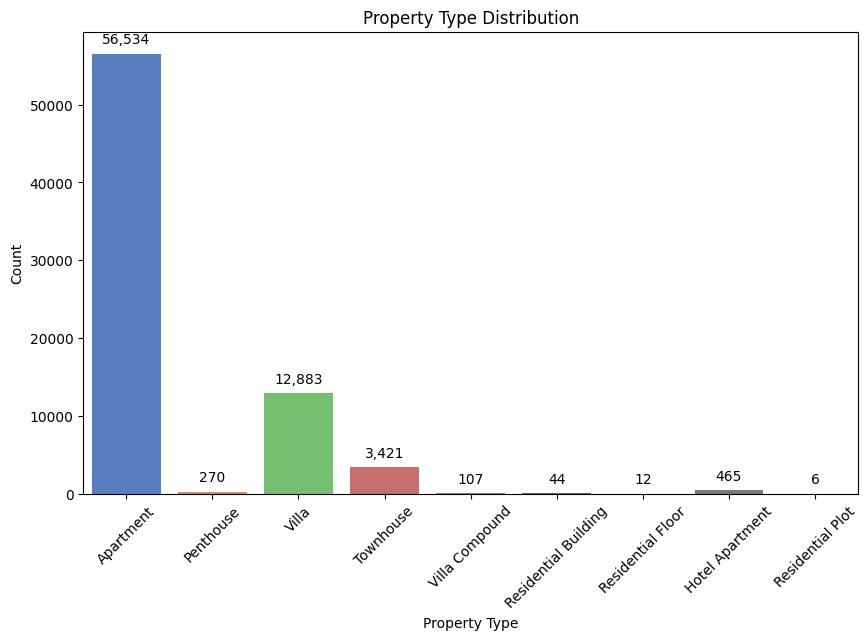

In [30]:
# Property Type Distribution
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Type', data=df, palette='muted')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

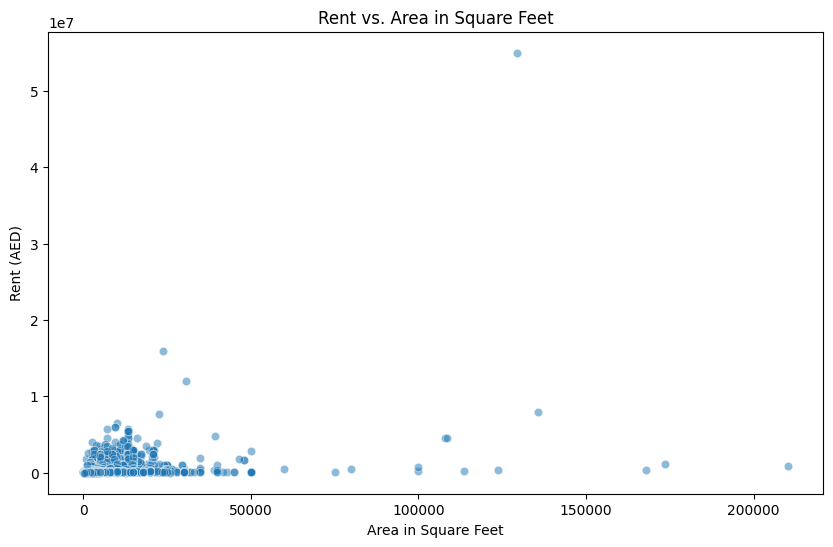

In [31]:
# Relationship between Rent and Area in Square Feet
plt.figure(figsize=(10,6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=df, alpha=0.5)
plt.title('Rent vs. Area in Square Feet')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent (AED)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


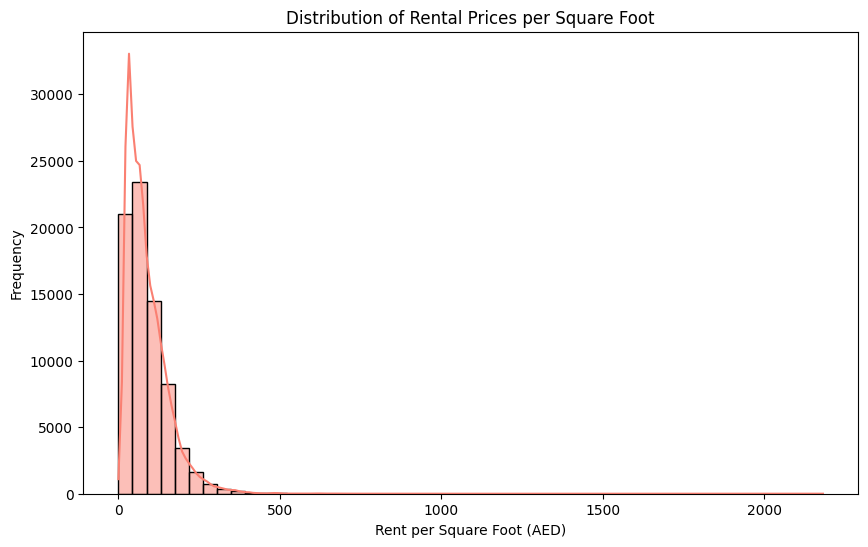

In [32]:
# Distribution of Rental Prices per Square Foot
plt.figure(figsize=(10,6))
sns.histplot(df['Rent_per_sqft'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Rental Prices per Square Foot')
plt.xlabel('Rent per Square Foot (AED)')
plt.ylabel('Frequency')
plt.show()

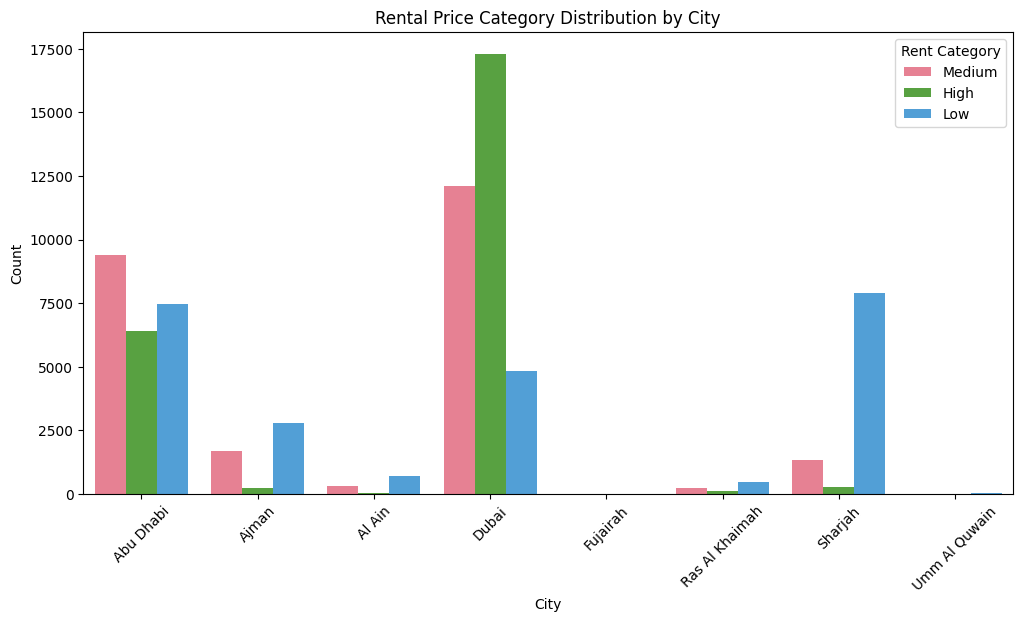

In [33]:
# Rental Price Category Distribution by City
plt.figure(figsize=(12,6))
sns.countplot(x='City', hue='Rent_category', data=df, palette='husl')
plt.title('Rental Price Category Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Rent Category')
plt.xticks(rotation=45)
plt.show()

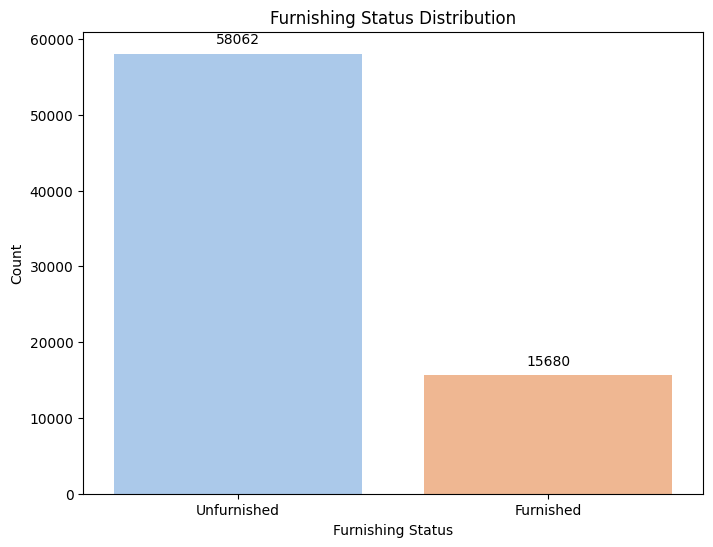

In [34]:
# Furnishing Status Distribution
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Furnishing', data=df, palette='pastel')
plt.title('Furnishing Status Distribution')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


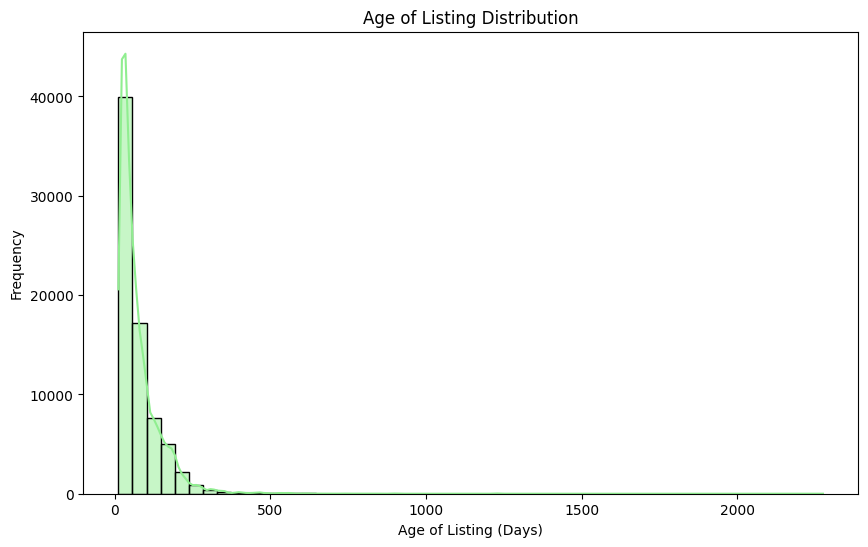

In [18]:
# Age of Listing Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age_of_listing_in_days'], bins=50, kde=True, color='lightgreen')
plt.title('Age of Listing Distribution')
plt.xlabel('Age of Listing (Days)')
plt.ylabel('Frequency')
plt.show()

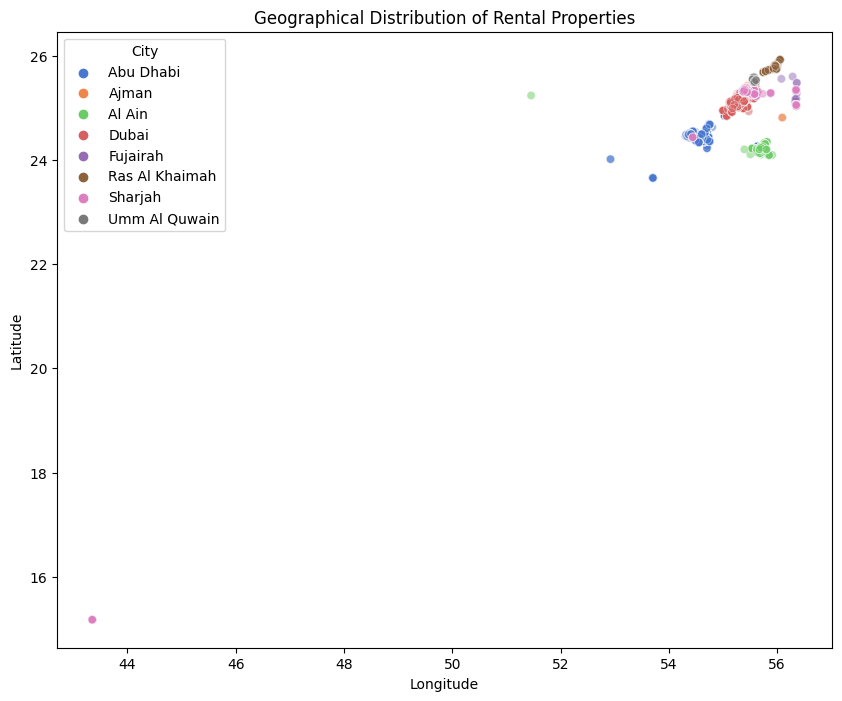

In [20]:
# Geographical Distribution of Rental Properties
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='City', data=df, palette='muted', alpha=0.5)
plt.title('Geographical Distribution of Rental Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City')
plt.show()

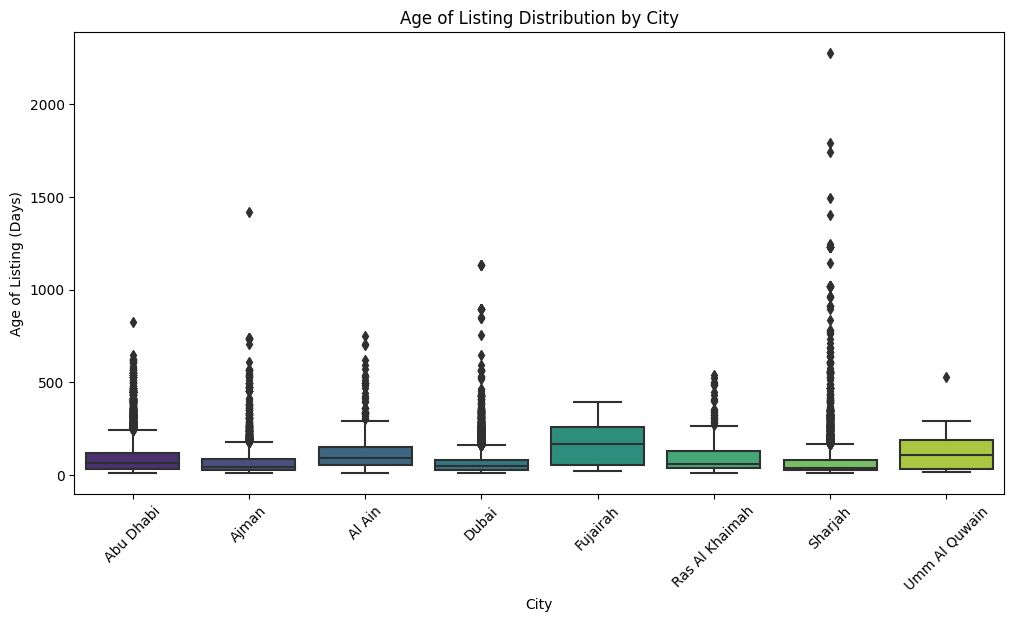

In [23]:
# Age of Listing Distribution by City
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='Age_of_listing_in_days', data=df, palette='viridis')
plt.title('Age of Listing Distribution by City')
plt.xlabel('City')
plt.ylabel('Age of Listing (Days)')
plt.xticks(rotation=45)
plt.show()

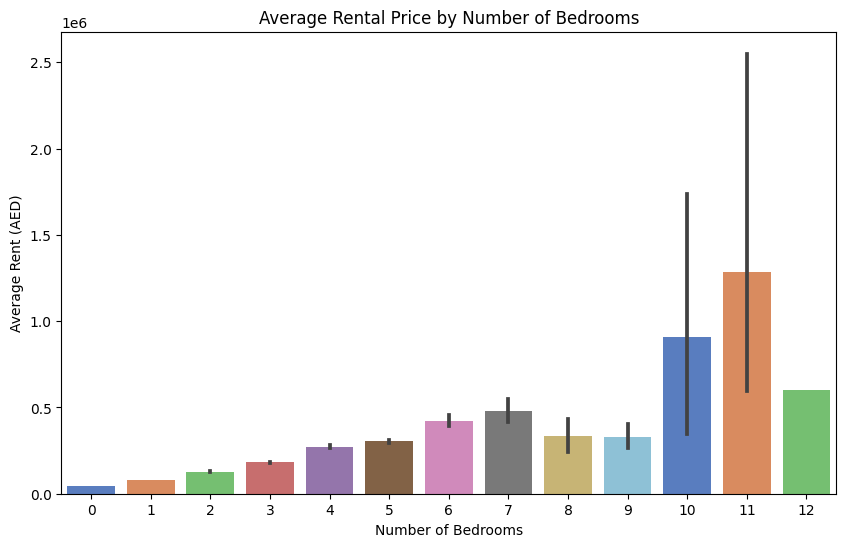

In [24]:
# Average Rental Price by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.barplot(x='Beds', y='Rent', data=df, palette='muted')
plt.title('Average Rental Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent (AED)')
plt.show()


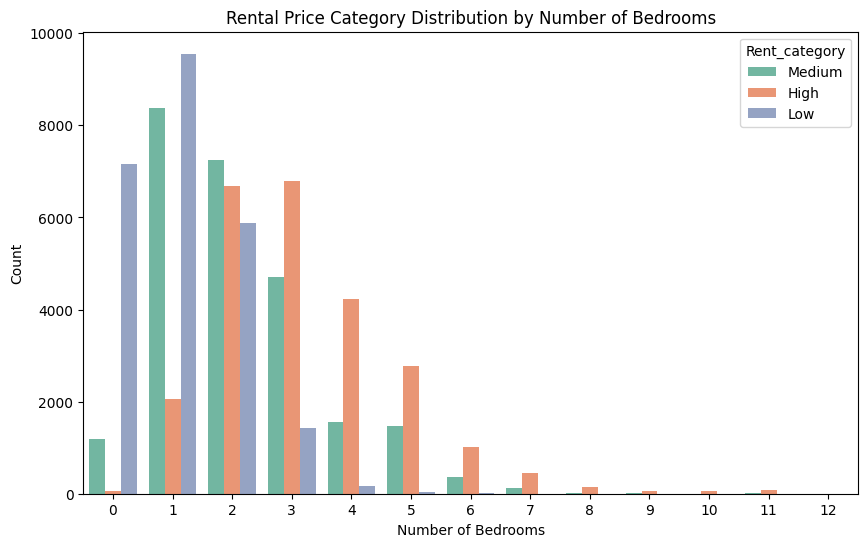

In [25]:
# Rental Price Category Distribution by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.countplot(x='Beds', hue='Rent_category', data=df, palette='Set2')
plt.title('Rental Price Category Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

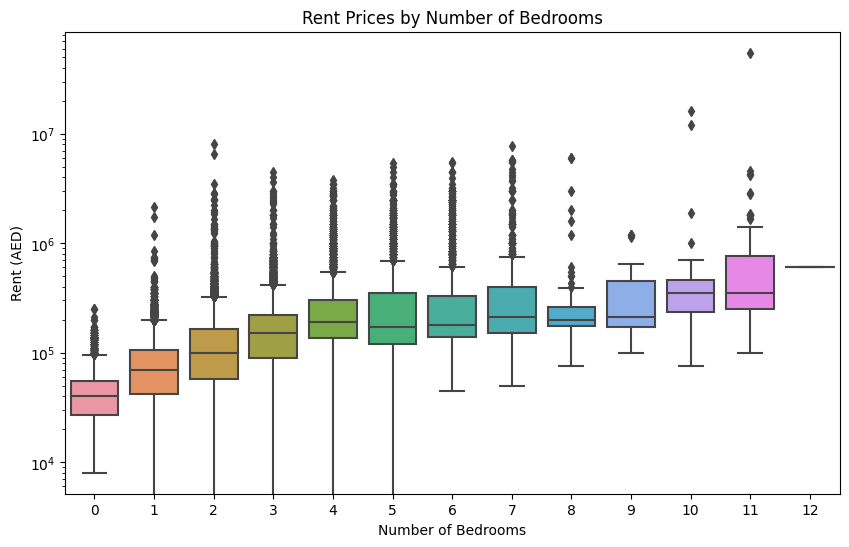

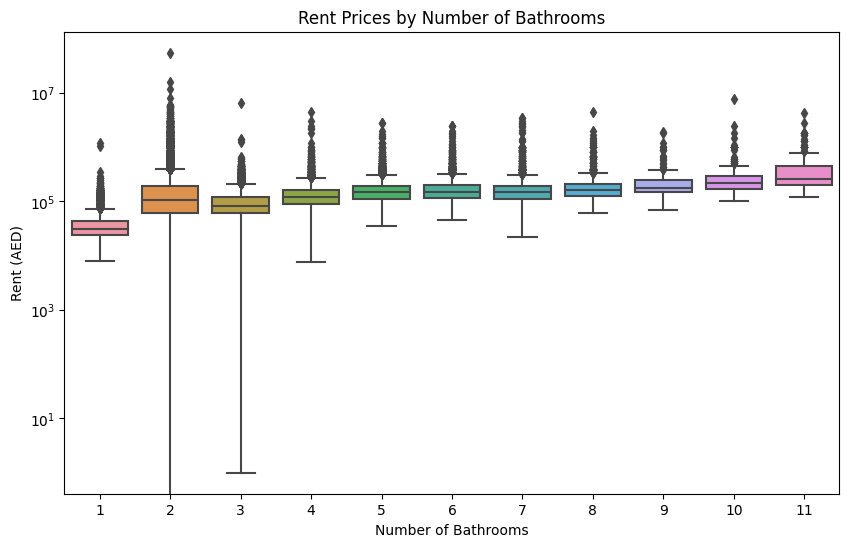

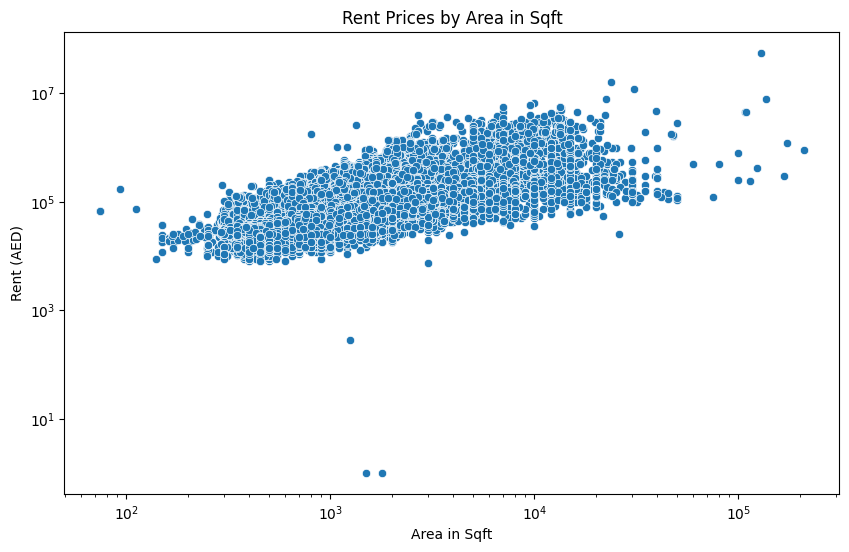

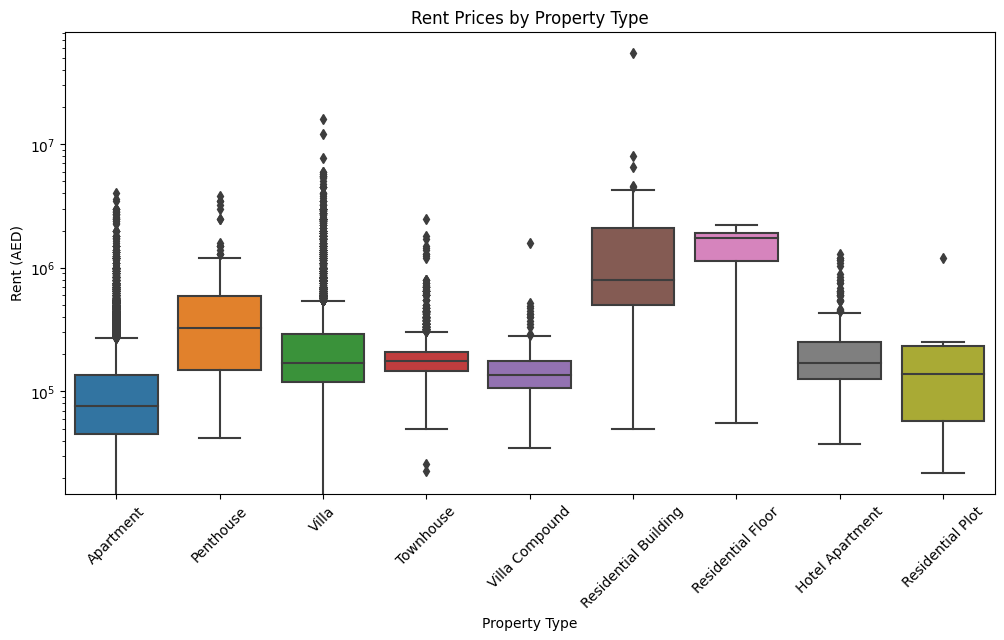

In [36]:
# Analyzing the relationship between rent and number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Beds', y='Rent', data=df)
plt.title('Rent Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and number of bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Baths', y='Rent', data=df)
plt.title('Rent Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and area in sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=df)
plt.title('Rent Prices by Area in Sqft')
plt.xlabel('Area in Sqft')
plt.ylabel('Rent (AED)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Rent', data=df)
plt.title('Rent Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


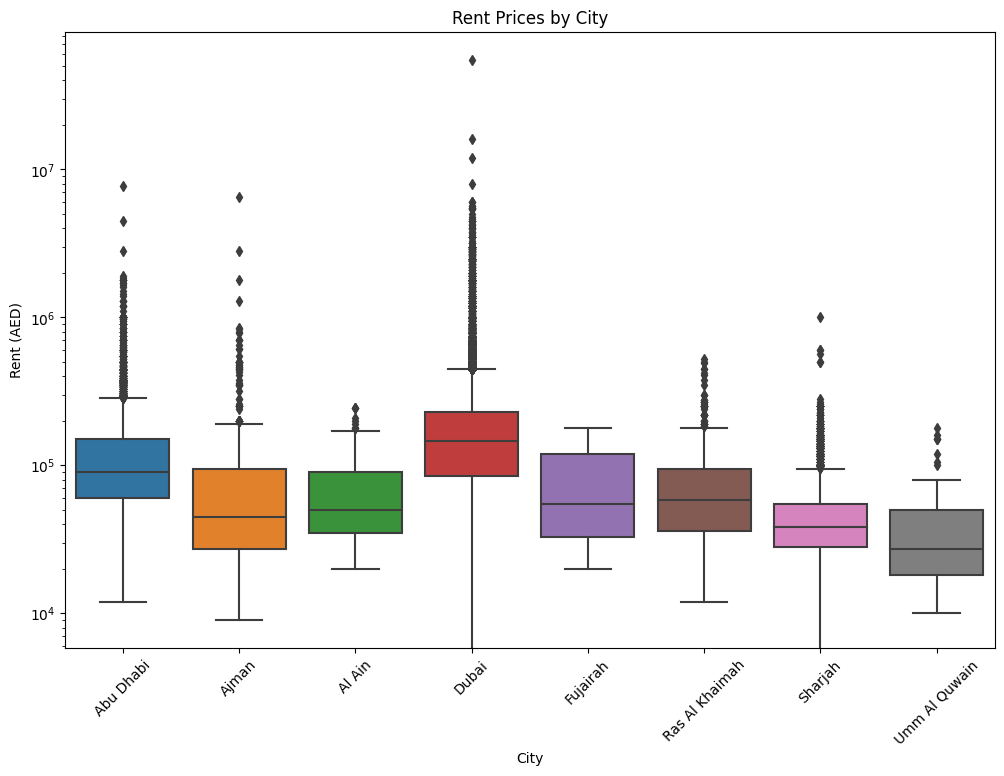

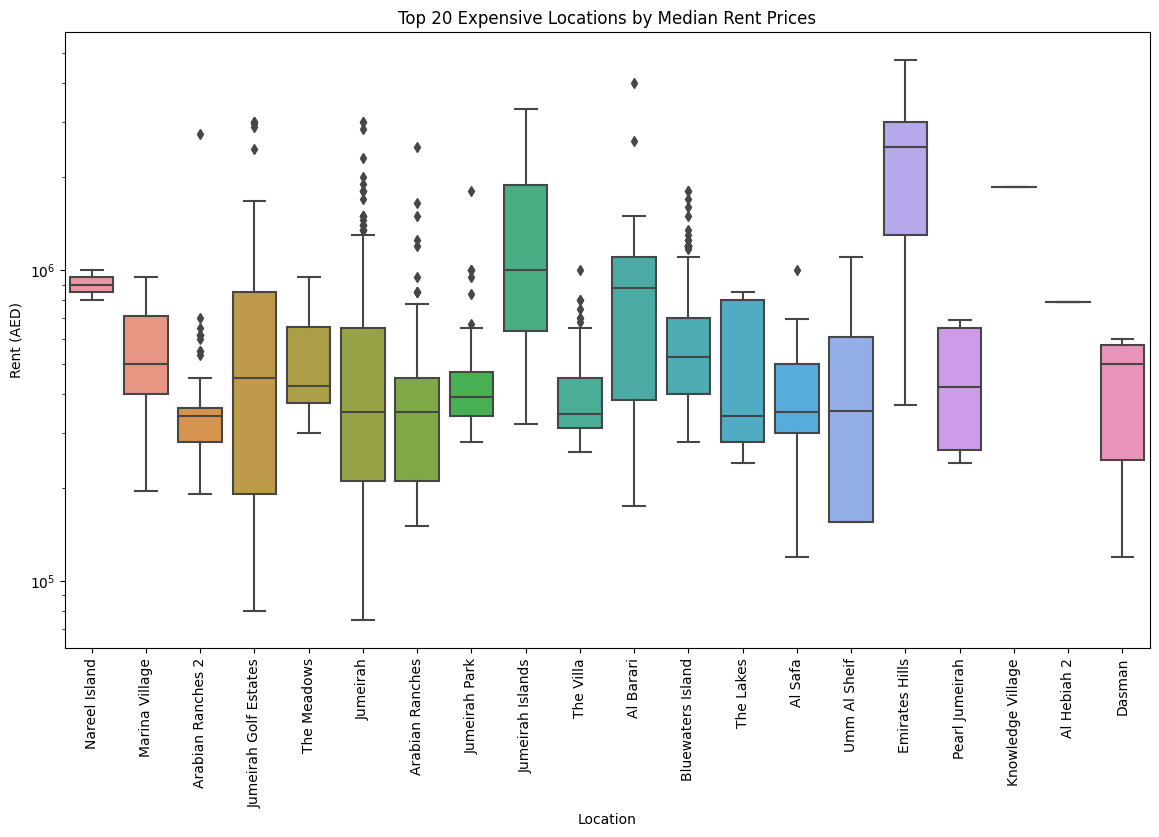

In [49]:
# Analyzing how rent varies across different cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Rent', data=df)
plt.title('Rent Prices by City')
plt.xlabel('City')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

# Analyzing how rent varies across different locations within cities
# Due to potentially large number of locations, we display only the top 20 locations by median rent
top_locations = df.groupby('Location')['Rent'].median().sort_values(ascending=False).head(20).index
filtered_data = df[df['Location'].isin(top_locations)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Rent', data=filtered_data)
plt.title('Top 20 Expensive Locations by Median Rent Prices')
plt.xlabel('Location')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Least Expensive Areas for Renting (Top 10):
Location
Al Raudah                          12000.0
Hamriyah Free Zone                 12000.0
Maysaloon                          13000.0
Masfoot                            13500.0
Al Hawiyah                         15000.0
Al Yarmook                         15000.0
Al Rass                            16000.0
Al Bataeh                          16000.0
Al Humaid City                     16000.0
Emirates Modern Industrial Area    16000.0
Name: Rent, dtype: float64

Most Expensive Areas for Renting (Top 10):
Location
Jumeirah Golf Estates     450000.0
Marina Village            500000.0
Dasman                    500000.0
Bluewaters Island         527500.0
Al Hebiah 2               790000.0
Al Barari                 875000.0
Nareel Island             900000.0
Jumeirah Islands         1000000.0
Knowledge Village        1859550.0
Emirates Hills           2499000.0
Name: Rent, dtype: float64


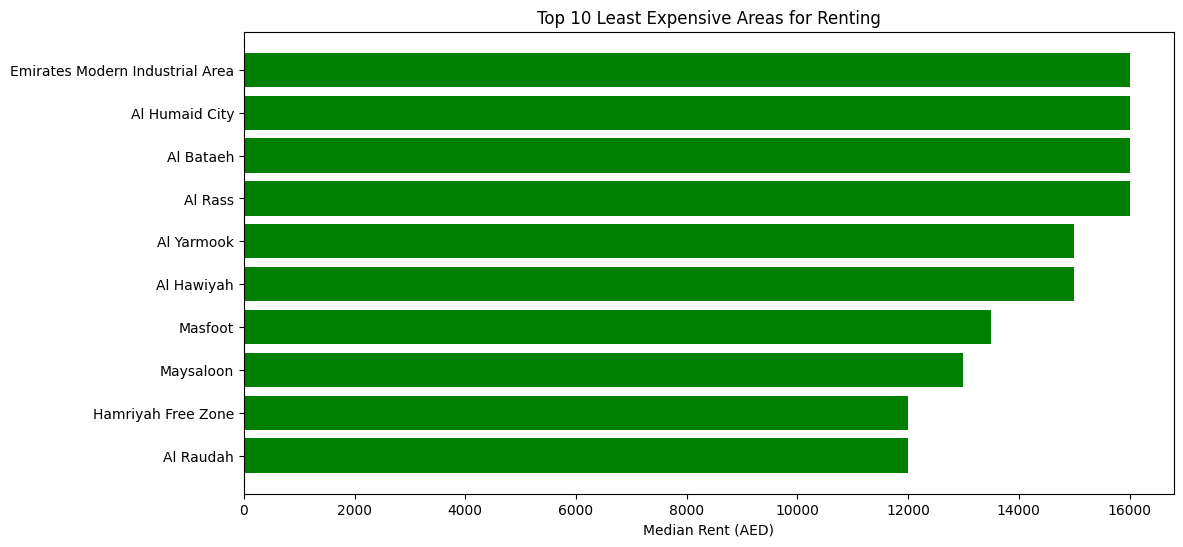

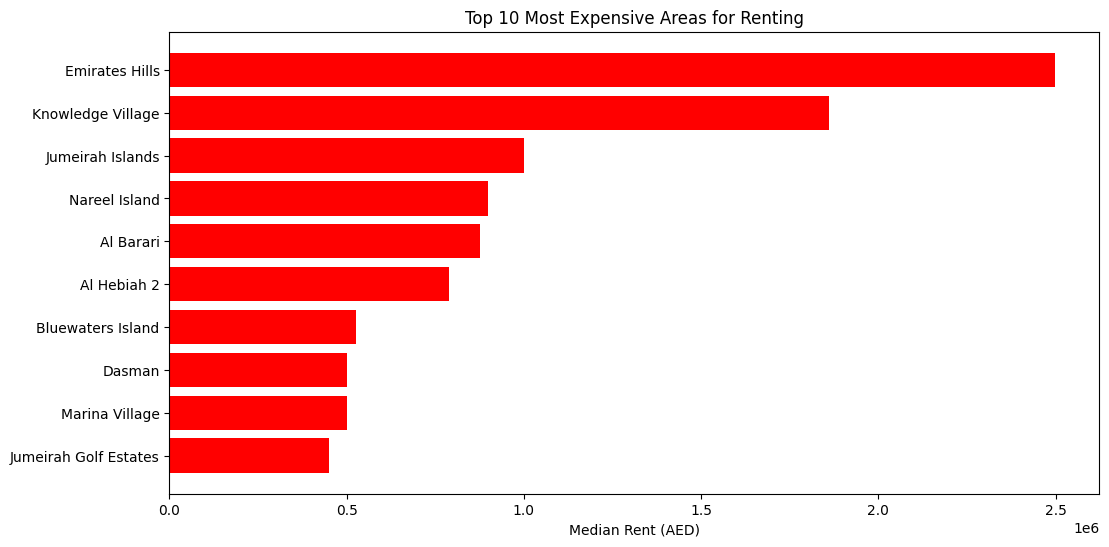

In [43]:
# Identify the most expensive and least expensive areas for renting
# Calculate median rent for each location and sort them
location_rent_stats = df.groupby('Location')['Rent'].median().sort_values()

# Display the least expensive areas
print("Least Expensive Areas for Renting (Top 10):")
print(location_rent_stats.head(10))

# Display the most expensive areas
print("\nMost Expensive Areas for Renting (Top 10):")
print(location_rent_stats.tail(10))

# Least expensive areas
plt.figure(figsize=(12, 6))
least_expensive = location_rent_stats.head(10)
plt.barh(least_expensive.index, least_expensive.values, color='green')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Least Expensive Areas for Renting')
plt.show()

# Most expensive areas
plt.figure(figsize=(12, 6))
most_expensive = location_rent_stats.tail(10)
plt.barh(most_expensive.index, most_expensive.values, color='red')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Most Expensive Areas for Renting')
plt.show()

In [52]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        mode = 'markers',
        marker=dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues'
        )
        ))

fig.update_layout(
        title = 'Geo Spatial View',
        geo=dict(
        scope='asia',  # Set the geographic scope
        showland=True,
        landcolor = "rgb(250, 250, 250)",
        subunitcolor = "rgb(217, 217, 217)",
        countrywidth = 0.5,
        subunitwidth = 0.5,
        showcountries=True,
        countrycolor='darkgray',
        showocean=True,
        oceancolor='lightblue',
        showlakes=True,
        lakecolor='lightblue',
        showrivers=True,
        rivercolor='lightblue',
        showcoastlines=True,
        coastlinecolor='darkblue',
        projection_type='natural earth',
        center=dict(lon=55.2708, lat=25.2048)
    )
)

fig.show()

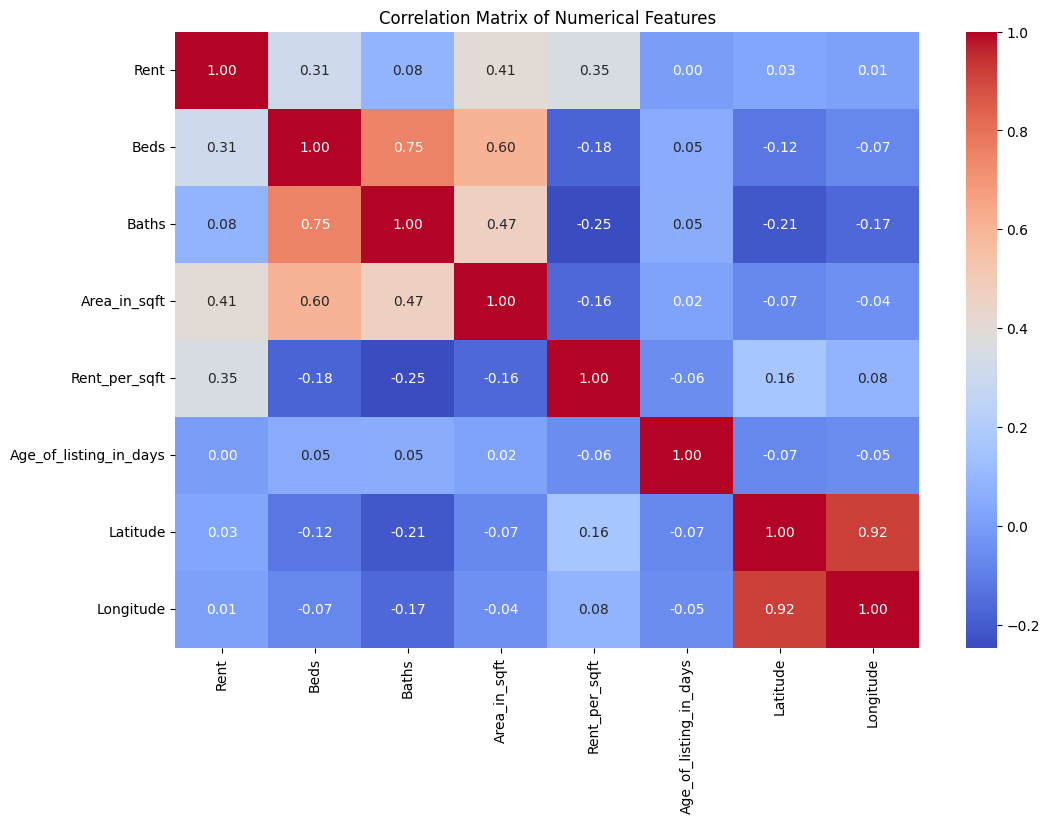

In [54]:
# Analyzing the correlation between numerical features and rent prices
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()